In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.preprocessing as sp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image, display_png
from pydot import graph_from_dot_data
from sklearn.tree import export_graphviz

In [10]:
data = pd.read_csv('./Emoji Diet Nutritional Data (g) - EmojiFoods (g).csv')
data

,name,emoji,Calories (kcal),Carbohydrates (g),Total Sugar (g),Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),...,Calcium (g),Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg)
0,grapes,🍇,0.69,0.1810,0.1548,0.0072,0.0016,0.00054,0.00007,0.00048,...,0.10,0.00127,0.0036,0.07,0.00071,0.20,1.91,0.001,0.02,0.0007
1,melon,🍈,0.28,0.0658,0.0569,0.0111,0.0010,0.00025,0.00002,0.00039,...,0.11,0.00060,0.0034,0.11,0.00035,0.05,1.82,0.004,0.09,0.0007
2,watermelon,🍉,0.30,0.0755,0.0620,0.0061,0.0015,0.00016,0.00037,0.00050,...,0.07,0.00042,0.0024,0.10,0.00038,0.11,1.12,0.004,0.01,0.0010
3,tangerine,🍊,0.53,0.1334,0.1058,0.0081,0.0031,0.00039,0.00060,0.00065,...,0.37,0.00042,0.0015,0.12,0.00039,0.20,1.66,0.001,0.02,0.0007
4,lemon,🍋,0.29,0.0932,0.0250,0.0110,0.0030,0.00039,0.00011,0.00089,...,0.26,0.00037,0.0060,0.08,0.00030,0.16,1.38,0.004,0.02,0.0006
5,banana,🍌,0.89,0.2284,0.1223,0.0109,0.0033,0.00112,0.00032,0.00073,...,0.05,0.00078,0.0026,0.27,0.00270,0.22,3.58,0.010,0.01,0.0015
6,pineapple,🍍,0.50,0.1312,0.0985,0.0054,0.0012,0.00009,0.00013,0.00040,...,0.13,0.00110,0.0029,0.12,0.00927,0.08,1.09,0.001,0.01,0.0012
7,red apple,🍎,0.63,0.1522,0.1168,0.0020,0.0018,0.00000,0.00000,0.00000,...,0.07,0.00025,0.0010,0.05,0.00031,0.13,1.09,0.000,0.01,0.0004
8,green apple,🍏,0.58,0.1361,0.0959,0.0044,0.0019,0.00000,0.00000,0.00000,...,0.05,0.00031,0.0015,0.05,0.00044,0.12,1.20,0.001,0.01,0.0004
9,pear,🍐,0.57,0.1523,0.0975,0.0036,0.0014,0.00022,0.00084,0.00094,...,0.09,0.00082,0.0018,0.07,0.00048,0.12,1.16,0.001,0.01,0.0010


In [11]:
labels =[0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,1,0,1,1,1,1,
         1,1,1,1,1,2,2,2,2,3,
         3,3,3,4,4,4,4,4,4,4,
         2,2,2,3,5,5,5,5,5,5,
         5,5,6,6,6,6,6,6]
len(labels)

data['labels']= labels
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 36 columns):
name                              58 non-null object
emoji                             58 non-null object
Calories (kcal)                   58 non-null float64
Carbohydrates (g)                 58 non-null float64
Total Sugar (g)                   58 non-null float64
Protein (g)                       58 non-null float64
Total Fat (g)                     58 non-null float64
Saturated Fat (g)                 58 non-null float64
Monounsaturated Fat (g)           58 non-null float64
Polyunsaturated Fat (g)           58 non-null float64
Total Fiber (g)                   58 non-null float64
Cholesterol (mg)                  58 non-null float64
Vitamin B6 (mg)                   58 non-null float64
Vitamin A (IU)                    58 non-null float64
Vitamin B12 (ug)                  58 non-null float64
Vitamin C (mg)                    58 non-null float64
Vitamin D (IU)                    5

In [12]:
data.head()

,name,emoji,Calories (kcal),Carbohydrates (g),Total Sugar (g),Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),...,Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg),labels
0,grapes,🍇,0.69,0.1810,0.1548,0.0072,0.0016,0.00054,0.00007,0.00048,...,0.00127,0.0036,0.07,0.00071,0.20,1.91,0.001,0.02,0.0007,0
1,melon,🍈,0.28,0.0658,0.0569,0.0111,0.0010,0.00025,0.00002,0.00039,...,0.00060,0.0034,0.11,0.00035,0.05,1.82,0.004,0.09,0.0007,0
2,watermelon,🍉,0.30,0.0755,0.0620,0.0061,0.0015,0.00016,0.00037,0.00050,...,0.00042,0.0024,0.10,0.00038,0.11,1.12,0.004,0.01,0.0010,0
3,tangerine,🍊,0.53,0.1334,0.1058,0.0081,0.0031,0.00039,0.00060,0.00065,...,0.00042,0.0015,0.12,0.00039,0.20,1.66,0.001,0.02,0.0007,0
4,lemon,🍋,0.29,0.0932,0.0250,0.0110,0.0030,0.00039,0.00011,0.00089,...,0.00037,0.0060,0.08,0.00030,0.16,1.38,0.004,0.02,0.0006,0


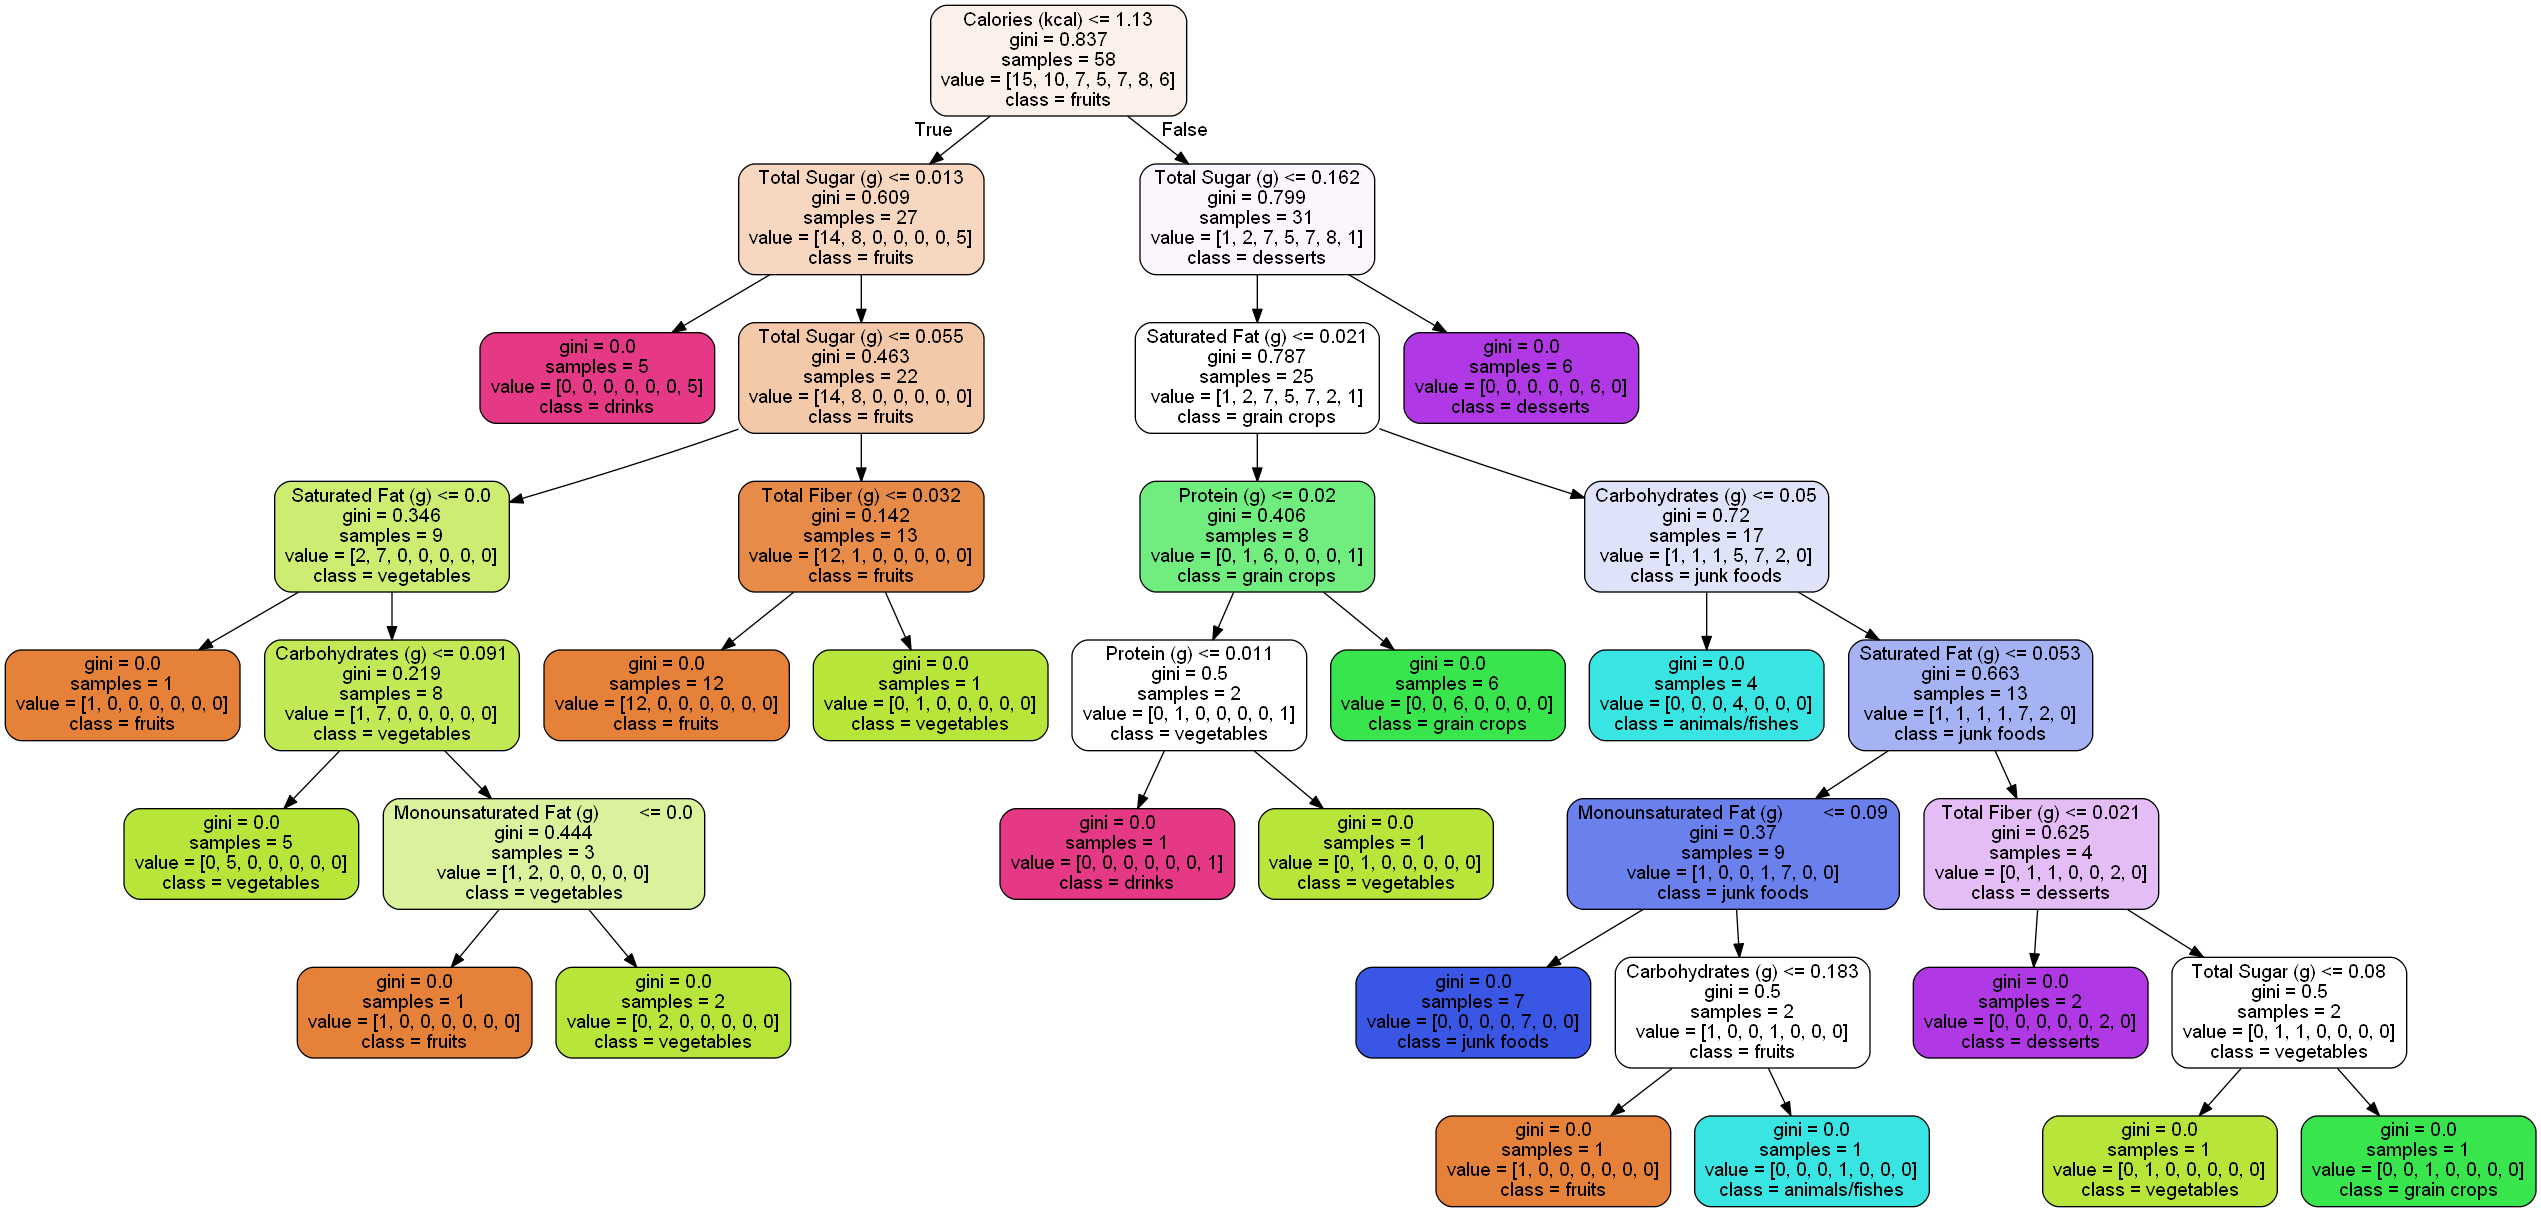

In [21]:
from sklearn.externals.six import StringIO

tree = DecisionTreeClassifier(criterion='gini', random_state =1, min_samples_leaf=1)

X_train = data.iloc[:, 2:11]
y_train = data['labels']

dot_data = StringIO()

tree.fit(X_train, y_train)
export_graphviz(tree, filled = True, rounded = True, class_names = ['fruits','vegetables', 'grain crops', 
                                                                    'animals/fishes', 'junk foods', 'desserts', 
                                                                    'drinks'],
                          feature_names = data.columns[2:11].values, out_file = dot_data)


graph = graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
# display_png(Image('tree.png'))

graph[0].write_png('tree.png', prog="C:/Program Files (x86)/Graphviz2.38/bin/dot.exe")
display_png(Image('tree.png'))

In [24]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Calories (kcal) <= 1.13\\ngini = 0.837\\nsamples = 58\\nvalue = [15, 10, 7, 5, 7, 8, 6]\\nclass = fruits", fillcolor="#e581391b"] ;\n1 [label="Total Sugar (g) <= 0.013\\ngini = 0.609\\nsamples = 27\\nvalue = [14, 8, 0, 0, 0, 0, 5]\\nclass = fruits", fillcolor="#e5813951"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 0, 0, 0, 0, 0, 5]\\nclass = drinks", fillcolor="#e53986ff"] ;\n1 -> 2 ;\n3 [label="Total Sugar (g) <= 0.055\\ngini = 0.463\\nsamples = 22\\nvalue = [14, 8, 0, 0, 0, 0, 0]\\nclass = fruits", fillcolor="#e581396d"] ;\n1 -> 3 ;\n4 [label="Saturated Fat (g) <= 0.0\\ngini = 0.346\\nsamples = 9\\nvalue = [2, 7, 0, 0, 0, 0, 0]\\nclass = vegetables", fillcolor="#b7e539b6"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0, 0, 0, 0, 0, 0]\\nclass = fruits", fillcolor